# Решение задач оптимизации с помощью библиотеки SciPy
В этом задании решается задача поиска минимума функции с помощью одного из градиентных методов оптимизации (BFGS), метода глобальной оптимизации (дифференциальной эволюции), а также задача поиска глобального минимума негладкой функции, у которой не определен градиент.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy import optimize

Зададим гладкую функцию:

In [3]:
def f(t):
    return np.sin( t / 5) * np.exp(t/ 10) + 5 * np.exp(- t/ 2)

Используя scipy.optimize.minimize, найдем минимум функции с помощью градиентного метода оптимизации с различным начальным приближением (x=2, x=30):

In [4]:
x = np.arange(1.0, 31.0, 1.0)
last_string = []
res0 = optimize.minimize(f, x[1], method='BFGS')
print(res0.fun)

1.7452682903447336


In [5]:
res1 = optimize.minimize(f, x[29], method='BFGS')
print(res1.fun) 

-11.898894665981313


Применим к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

In [6]:
res2 = optimize.differential_evolution(f, [(1, 30)])
print(res2.fun)

[-11.89889467]


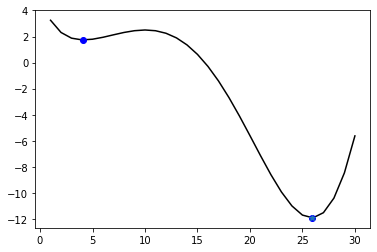

In [7]:
plt.plot(x, f(x), 'k', res0.x, res0.fun, 'bo', res1.x, res1.fun, 'bo', res2.x, res2.fun, '*')
plt.show()

Зададим негладкую функцию:

In [8]:
def h(t):
    xx = np.sin( t / 5) * np.exp(t/ 10) + 5 * np.exp(- t/ 2)
    return xx.astype(int)

Попробуем найти ее минимум градиентным методом:

In [9]:
k = np.arange(1, 31, 1)
res3 = optimize.minimize(h, k[-1], method='BFGS')
print(res3.fun)

-5


Применим метод дифференциальной эволюции для поиска минимума негладкой функции:

In [10]:
res4 = optimize.differential_evolution(h, [(1, 30)])
print(res4.fun)

-11.0


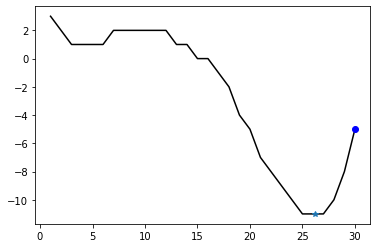

In [11]:
plt.plot(k, h(k), 'k', res3.x, res3.fun, 'bo', res4.x, res4.fun, '*')
plt.show()